In [1]:
%matplotlib ipympl

import sys
sys.path.append('../')


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from helper import extract_embeddings

In [2]:
sbert_explained_variance_95 = {
    "alfred": 165,
    "scout": 194,
    "rt1": 27,
    "bridge": 115,
    "tacoplay": 31
}

In [3]:
model_name = "all-mpnet-base-v2" # sbert
dataset_name = "tacoplay"

results_fp = f"/home/slwanna/neural-feature-extraction/neural_feature_extraction/notebooks/results/01_{model_name}_{dataset_name}"

embeddings = extract_embeddings(f"{results_fp}.csv")

data = np.array(embeddings)

data.shape

(213972, 768)

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extract

Text(0, 0.5, 'SSE')

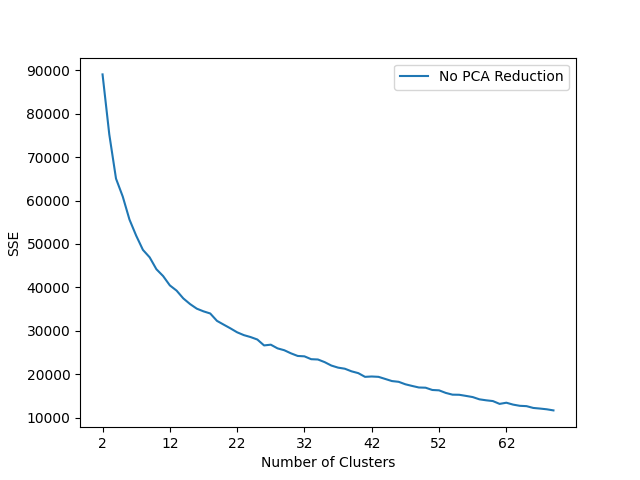

In [4]:
sse = []
k_start = 2
k_end = 70
clusters_range = range(k_start, k_end)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(clusters_range, sse,  label='No PCA Reduction')
plt.legend()
plt.xticks(np.arange(k_start, k_end, step=10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extract

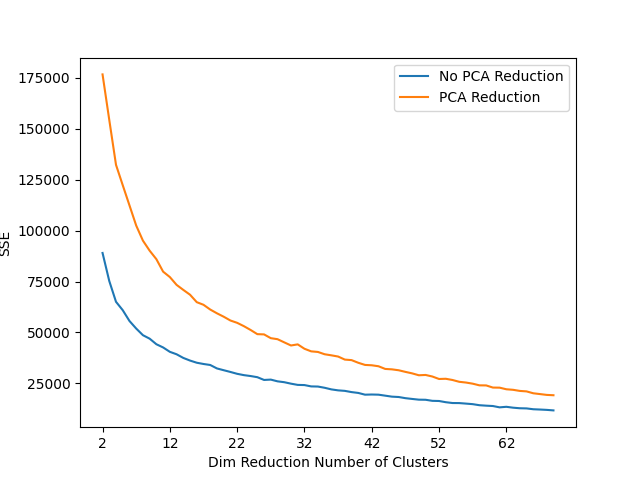

In [5]:
data = np.array(embeddings)
pca=PCA(n_components=sbert_explained_variance_95[dataset_name])
dim_reduced_embeddings = pca.fit_transform(data)

sse = []
X_dim_red = normalize(dim_reduced_embeddings, norm='l2')
k_start = 2
k_end = 70
clusters_range = range(k_start, k_end)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_dim_red)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(clusters_range, sse, label='PCA Reduction')
plt.legend()

plt.xticks(np.arange(k_start, k_end, step=10))
plt.xlabel("Dim Reduction Number of Clusters")
plt.ylabel("SSE")
plt.show()

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


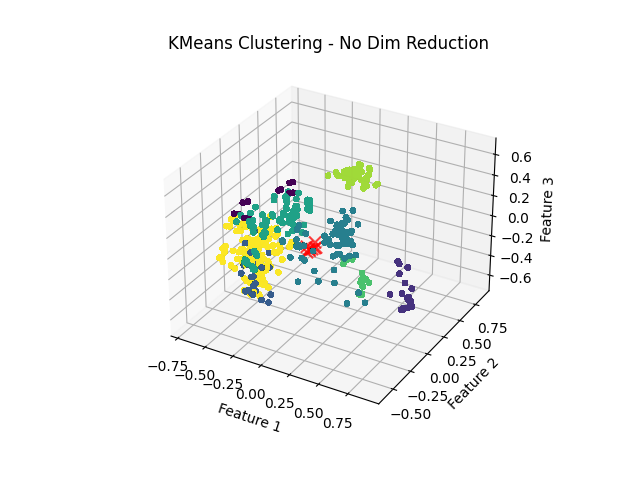

In [15]:
# Fit KMeans with n clusters
N_CLUSTERS = 8

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(embeddings)

# Get cluster centers and labels for each point
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
ax.scatter(X_dim_red[:, 0], X_dim_red[:, 1], X_dim_red[:, 2], c=labels, s=10, cmap='viridis')

# Plot the centroids
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=75, alpha=0.75, marker='x')

# Set plot title and labels
ax.set_title('KMeans Clustering - No Dim Reduction')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Show the plot
plt.show()

In [16]:
original_df = pd.read_csv(f"{results_fp}.csv")
original_df["kmeans_labels"] = labels

In [17]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213972 entries, 0 to 213971
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      213972 non-null  int64 
 1   nl_command_exs  213972 non-null  object
 2   embedding       213972 non-null  object
 3   kmeans_labels   213972 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 5.7+ MB


In [18]:
original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts(normalize=True).groupby(level=0).head(5)

kmeans_labels  nl_command_exs                                        
0              place the yellow object on the table                      0.113990
               place the pink object on the table                        0.113990
               place the yellow block on the table                       0.108808
               put the yellow block on the table                         0.093264
               place the purple object on the table                      0.088083
1              pull the drawer                                           0.076459
               grasp the drawer handle and open it                       0.074447
               grasp the handle of the drawer and open it                0.070423
               go open the drawer                                        0.068410
               open the cabinet drawer                                   0.064386
2              pick up the pink block                                    0.086172
               lift the yell

In [19]:
original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts().groupby(level=0).head(5)

kmeans_labels  nl_command_exs                                        
0              place the yellow object on the table                      1452
               place the pink object on the table                        1452
               place the yellow block on the table                       1386
               put the yellow block on the table                         1188
               place the purple object on the table                      1122
1              pull the drawer                                           2508
               grasp the drawer handle and open it                       2442
               grasp the handle of the drawer and open it                2310
               go open the drawer                                        2244
               open the cabinet drawer                                   2112
2              pick up the pink block                                    2838
               lift the yellow block                                    

In [20]:
# Step 1: Store the results in a variable
result = original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts().groupby(level=0).head(15)

# Step 2: Write the result to a .txt file
with open(f"/home/slwanna/neural-feature-extraction/neural_feature_extraction/notebooks/results/{model_name}_{dataset_name}_kmeans_membership_output.txt", "w") as file:
    file.write(result.to_string())